In [2]:
import py3Dmol
import requests
import numpy as np


def fetch_protein_structure(pdb_id) -> str:
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        raise ValueError(f"Could not fetch PDB file for ID {pdb_id}")
    
protein_to_pdb = {
    "insulin": "3I40",
    "collagen": "1BKV",
    "proteasome": "1YAR",
}

protein = "insulin"
pdb_structure = fetch_protein_structure(pdb_id=protein_to_pdb[protein])

pdbview = py3Dmol.view(width=400, height=300)
pdbview.addModel(pdb_structure, "pdb")
pdbview.setStyle({"cartoon": {"color": "spectrum"}})
pdbview.zoomTo()
pdbview.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [5]:
from dlfb.utils.display import print_short_dict

amino_acids = [ "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V", "A" ]

amino_acid_to_index = {
    amino_acid: index for index, amino_acid in enumerate(amino_acids)
}

print_short_dict(amino_acid_to_index)


{'R': 0, 'N': 1, 'D': 2, 'C': 3, 'Q': 4, 'E': 5, 'G': 6, 'H': 7, 'I': 8, 'L': 9}
…(+10 more entries)


In [6]:
tiny_protein = ["M", "E", "T", "A", "S", "T", "A", "S", "E" ]

tiny_protein_indices = [
    amino_acid_to_index[amino_acid] for amino_acid in tiny_protein  
]

tiny_protein_indices

[11, 5, 15, 19, 14, 15, 19, 14, 5]

In [7]:
import jax

one_hot_encoded_sequence = jax.nn.one_hot(
    x=tiny_protein_indices, num_classes=len(amino_acids)
)

print(one_hot_encoded_sequence)

INFO:2025-08-27 14:08:18,700:jax._src.xla_bridge:830: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
2025-08-27 14:08:18.700 INFO jax._src.xla_bridge xla_bridge - backends: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Text(0.5, 96.72222222222221, 'Protein sequence')

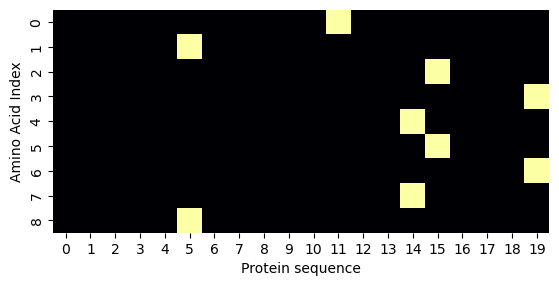

In [9]:
import seaborn as sns

fig = sns.heatmap(
    one_hot_encoded_sequence,
    square=True,
    cbar=False,
    cmap="inferno")

fig.set_ylabel("Amino Acid Index")
fig.set_xlabel("Protein sequence")